In [1]:
!pip install toad

In [2]:
import pandas as pd
import toad
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

### Read data

In [3]:
# read raw data, drop first column
raw_data = pd.read_csv(r'LoanStats_2016Q2.csv', header=1, skipfooter=3, engine='python')
raw_data1 = pd.read_csv(r'LoanStats_2016Q3.csv', header=1, skipfooter=3, engine='python')
raw_data2 = pd.read_csv(r'LoanStats_2016Q4.csv', header=1, skipfooter=3, engine='python')
raw_data3 = pd.read_csv(r'LoanStats_2017Q1.csv', header=1, skipfooter=3, engine='python')
raw_data4 = pd.read_csv(r'LoanStats_2017Q2.csv', header=1, skipfooter=3, engine='python')
raw_data5 = pd.read_csv(r'LoanStats_2017Q3.csv', header=1, skipfooter=3, engine='python')
raw_data6 = pd.read_csv(r'LoanStats_2017Q4.csv', header=1, skipfooter=3, engine='python')
raw_data7 = pd.read_csv(r'LoanStats_2018Q1.csv', header=1, skipfooter=3, engine='python')
raw_data8 = pd.read_csv(r'LoanStats_2018Q2.csv', header=1, skipfooter=3, engine='python')

combined_data = pd.concat([raw_data, raw_data1, raw_data2, raw_data3, raw_data4, raw_data5, raw_data6, raw_data7, raw_data8], ignore_index=True)

combined_data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,17200,17200,17200.0,60 months,14.49%,404.60,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4800,4800,4800.0,36 months,13.49%,162.87,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,9000,9000,9000.0,36 months,13.99%,307.56,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1500,1500,1500.0,36 months,19.99%,55.74,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,20000,20000,20000.0,36 months,8.59%,632.19,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982730,NaN,NaN,12000,12000,12000.0,36 months,11.98%,398.46,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
982731,NaN,NaN,3000,3000,3000.0,36 months,20.39%,112.09,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
982732,NaN,NaN,14000,14000,13975.0,36 months,16.01%,492.27,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
982733,NaN,NaN,7500,7500,7500.0,36 months,10.90%,245.19,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Choosing the relevant variables that can be used to predict the creditworthiness of individuals or businesses.

- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    - Reason: The amount of money requested can impact the risk of default, as larger loans may be more difficult for borrowers to repay. Additionally, it affects the borrower's debt burden, especially when combined with other financial obligations.

- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
    - Reason: The number of loan payments (in months) provides an understanding of the repayment horizon. Longer terms might lead to lower monthly payments, which could be easier for borrowers to manage, but they also carry higher interest and risk over time.

- int_rate : Interest Rate on the loan
    - Reason: The interest rate reflects the cost of borrowing, which is a direct indicator of risk. Higher interest rates are typically charged to riskier borrowers, meaning that the interest rate is a significant factor in evaluating the likelihood of default.

- grade: LC assigned loan grade
    - Reason: The loan grade is assigned by the lender and summarizes the perceived risk level of the borrower. It is a composite metric of several financial health indicators and provides a useful pre-evaluated measure of creditworthiness.

- sub_grade: LC assigned loan subgrade
    - Reason: The subgrade gives a more granular breakdown of the loan's risk category, allowing the model to capture nuanced differences among borrowers within the same primary grade.

- annual_inc: The annual income provided by the borrower during registration.
    - Reason: Borrower income directly affects the ability to repay the loan. Higher income usually indicates better repayment ability and is essential in assessing credit risk.

- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    - Reason: Owning a home may imply greater financial stability while renting or other statuses might indicate less stability. Homeownership can affect both the risk level and the types of loans a borrower is eligible for.

- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
    - Reason: Employment length is a measure of income stability. Borrowers with longer employment histories are generally considered more stable, reducing the risk of default.

- dti: The borrower's debt to income ratio, calculated using the monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income.
    - Reason: The debt-to-income ratio indicates how much of a borrower’s income is allocated to debt obligations. A high DTI suggests that the borrower may be over-leveraged, increasing the likelihood of default.

- inq_last_6mths: The number of inquiries by creditors during the past 6 months.
    - Reason: Multiple credit inquiries in a short period can signal that a borrower is desperate for credit, which may indicate financial instability. This is a useful predictor of risk.

- open_acc: The number of open credit lines in the borrower's credit file.
    - Reason: The number of open credit lines helps assess the borrower’s credit utilization and financial activity level. It gives insight into how responsibly the borrower is managing multiple sources of credit.

- pub_rec: Number of derogatory public records
    - Reason: Public derogatory records, such as bankruptcies or judgments, are strong indicators of past financial difficulties and can significantly impact the probability of default.

- revol_bal: Total credit revolving balance
    - Reason: The total revolving balance represents the borrower’s current credit card debt. High revolving balances can indicate higher risk, as the borrower may be over-relying on credit.

- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    - Reason: This is a measure of how much of the available revolving credit (e.g., credit cards) is currently being used. High utilization rates may indicate financial stress or overextension, which could lead to higher default risk.

- mort_acc: Number of mortgage accounts.
    - Reason: The number of mortgage accounts may indicate overall creditworthiness, as mortgages are typically associated with better credit profiles and greater financial stability.

- total_acc: The total number of credit lines currently in the borrower's credit file. 
    - Reason: The total number of credit lines helps measure the borrower’s experience in managing multiple credit obligations. Borrowers with a well-managed history of credit are generally less risky.
    
- installment: The monthly payment owed by the borrower if the loan originates.
    - Reason: The monthly installment amount reflects the borrower’s obligation to repay, which needs to be managed within the borrower’s income and financial situation. Higher monthly payments may increase default risk if the borrower’s cash flow is limited.

- last_credit_pull_d: The most recent date LC pulled credit for this loan
    - Reason: last_credit_pull_d (Date of the Last Credit Pull) is relevant because it indicates how recent the borrower’s credit information is. Creditworthiness can change rapidly, and the most recent credit pull date helps ensure that the model uses up-to-date credit data to assess the borrower's current financial situation. If the credit pull is outdated, the risk assessment may not reflect recent changes, such as a new loan, increased debt, or a negative credit event, which could significantly affect the probability of default.

- verification_status: Refers to whether the borrower’s income information has been verified by the lending institution. It typically includes statuses such as "Verified," "Not Verified," or "Source Verified."
    - Reason: Including verification_status in the model is important because it directly influences the reliability of the borrower's reported financial data. If the income is verified, there is greater confidence that the borrower can afford the loan, which translates to a lower risk of default. Conversely, unverified information introduces uncertainty, potentially increasing the likelihood of default. Therefore, verification_status is a key factor in evaluating the accuracy of the borrower’s ability to meet repayment obligations, making it highly relevant for the credit risk model.

- avg_cur_bal: Average current balance of all accounts
    - Reason: avg_cur_bal is a useful indicator of the borrower’s credit utilization and financial behavior. It provides insight into the average debt level the borrower maintains across all accounts. If the average balance is high, it might indicate that the borrower has a significant debt burden, which could lead to higher default risk due to limited financial flexibility. Conversely, a lower average balance might suggest better financial management and lower credit risk. Including avg_cur_bal helps assess the borrower's overall financial health and repayment capacity, making it a relevant feature for the predictive model.

- acc_open_past_24mths: Number of trades opened in past 24 months.
    - Reason: This variable helps measure the borrower’s recent credit activity, indicating their financial behavior and appetite for credit. High numbers may signal aggressive borrowing behavior, potentially increasing the risk of default, while low numbers can indicate financial conservativeness, which is often associated with lower risk.

- open_il_12m: The number of inquiries by creditors during the past 6 months.
    - Reason: This feature is important because it indicates recent borrowing activity related to installment loans, which could signal a borrower's increased reliance on credit. A high number of recently opened installment loans may suggest a growing debt burden and potential financial strain, thereby increasing the likelihood of default. Including open_il_12m can help the model capture recent borrowing trends and assess associated risk more accurately.



### Clean Data (EDA)

In [4]:
# map target data
status_mapping = {
    'Current': 0,
    'Fully Paid': 0,
    'Charged Off': 1,
    'Late (31-120 days)': 1,
    'In Grace Period': 0,
    'Default': 1,
    'Late (16-30 days)': 1,
    'Issued': 0
}

# Apply the mapping to create the target variable
combined_data['target'] = combined_data['loan_status'].map(status_mapping)
combined_data.drop('loan_status', axis=1, inplace=True)
combined_data.dropna(how='all', axis=1, inplace=True)


# Change datetime
combined_data['issue_date'] = pd.to_datetime(combined_data['issue_d'], format='%b-%Y')

In [5]:
combined_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target,issue_date
0,17200,17200,17200.0,60 months,14.49%,404.60,C,C4,mechanic,8 years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2016-06-01
1,4800,4800,4800.0,36 months,13.49%,162.87,C,C2,Technition,2 years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2016-06-01
2,9000,9000,9000.0,36 months,13.99%,307.56,C,C3,team leader,10+ years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1,2016-06-01
3,1500,1500,1500.0,36 months,19.99%,55.74,D,D4,Customer support specialist,9 years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2016-06-01
4,20000,20000,20000.0,36 months,8.59%,632.19,A,A5,Owner / CPA,3 years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2016-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982730,12000,12000,12000.0,36 months,11.98%,398.46,B,B5,NaN,NaN,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-04-01
982731,3000,3000,3000.0,36 months,20.39%,112.09,D,D4,Cleaner,10+ years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-04-01
982732,14000,14000,13975.0,36 months,16.01%,492.27,C,C5,client analyst,10+ years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-04-01
982733,7500,7500,7500.0,36 months,10.90%,245.19,B,B4,Residence Counselor,10+ years,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,2018-04-01


In [6]:
# Select useful column
data = combined_data[['issue_date', 'target', 'loan_amnt', 'term', 'int_rate', 
                     'grade', 'sub_grade', 'annual_inc', 'home_ownership', 'emp_length',
                     'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                     'mort_acc', 'total_acc', 'installment', 'last_credit_pull_d', 'verification_status',
                     'avg_cur_bal', 'acc_open_past_24mths', 'open_il_12m']]

In [7]:
# split train/test

start_date = 'Apr-2016'
end_date = 'Jun-2017'
train_range = pd.date_range(start=start_date, end=end_date)

start_date = 'Jul-2017'
end_date = 'Dec-2017'
test_range = pd.date_range(start=start_date, end=end_date)

start_date = 'Jan-2018'
end_date = 'Jun-2018'
OOT_range = pd.date_range(start=start_date, end=end_date)

train = data.loc[data.issue_date.isin(train_range)]
test = data.loc[data.issue_date.isin(test_range)]
OOT = data.loc[data.issue_date.isin(OOT_range)]


In [8]:
# Using toad package
detection_results = toad.detect(train)
sort_by_high_missing = detection_results.sort_values(by='missing', ascending=False)
print(sort_by_high_missing[:40])

                                type    size missing  unique  \
emp_length                    object  502750   6.52%      11   
revol_util                    object  502750   0.06%    1173   
dti                          float64  502750   0.03%    6230   
issue_date            datetime64[ns]  502750   0.00%      15   
pub_rec                        int64  502750   0.00%      29   
acc_open_past_24mths           int64  502750   0.00%      49   
avg_cur_bal                  float64  502750   0.00%   60743   
verification_status           object  502750   0.00%       3   
last_credit_pull_d            object  502750   0.00%      29   
installment                  float64  502750   0.00%   44417   
total_acc                      int64  502750   0.00%     126   
mort_acc                       int64  502750   0.00%      35   
revol_bal                      int64  502750   0.00%   63413   
open_acc                       int64  502750   0.00%      78   
target                         int64  50

In [9]:
quality_results = toad.quality(train, target='target', iv_only=True)
quality_results

,iv,gini,entropy,unique
int_rate,0.531249,NaN,NaN,123.0
sub_grade,0.456888,NaN,NaN,35.0
grade,0.423785,NaN,NaN,7.0
last_credit_pull_d,0.421780,NaN,NaN,30.0
issue_date,0.100127,NaN,NaN,15.0
acc_open_past_24mths,0.092163,NaN,NaN,49.0
verification_status,0.077593,NaN,NaN,3.0
inq_last_6mths,0.051428,NaN,NaN,6.0
open_il_12m,0.049357,NaN,NaN,17.0
installment,0.047148,NaN,NaN,44417.0


In [10]:
train_selected, dropped = toad.selection.select(train, target='target', empty=0.9, iv=0.02, corr=0.7, return_drop=True, exclude=['issue_date'])
print(train_selected)

       issue_date  target int_rate grade sub_grade  annual_inc home_ownership  \
0      2016-06-01       0   14.49%     C        C4     73000.0       MORTGAGE   
1      2016-06-01       0   13.49%     C        C2    111000.0           RENT   
2      2016-06-01       1   13.99%     C        C3    125000.0       MORTGAGE   
3      2016-06-01       0   19.99%     D        D4     32000.0           RENT   
4      2016-06-01       0    8.59%     A        A5    210000.0       MORTGAGE   
...           ...     ...      ...   ...       ...         ...            ...   
502745 2017-04-01       1   23.99%     E        E2    107000.0           RENT   
502746 2017-04-01       0    7.99%     A        A5     65000.0       MORTGAGE   
502747 2017-04-01       0   16.99%     D        D1     37000.0           RENT   
502748 2017-04-01       0   11.44%     B        B4     41000.0           RENT   
502749 2017-04-01       1   25.49%     E        E4    105700.0       MORTGAGE   

          dti  inq_last_6mt

In [11]:
combiner = toad.transform.Combiner()

# Automatically bin the columns using ChiMerge method
# You can adjust `method` and `n_bins` as per your requirements
combiner.fit(train_selected, y='target', method='chi', min_samples=0.1, exclude=['issue_date'])

# Apply the combiner to transform the dataset
train_binned = combiner.transform(train_selected)

print(train_binned.head())

  issue_date  target  int_rate  grade  sub_grade  annual_inc  home_ownership  \
0 2016-06-01       0         3      2          2           2               0   
1 2016-06-01       0         2      2          2           3               2   
2 2016-06-01       1         2      2          2           3               0   
3 2016-06-01       0         3      3          3           0               2   
4 2016-06-01       0         1      0          0           3               0   

   dti  inq_last_6mths  revol_util  mort_acc  installment  last_credit_pull_d  \
0    1               1           0         1            1                   0   
1    4               0           2         0            0                   0   
2    4               2           2         1            0                   0   
3    0               2           0         0            0                   1   
4    1               1           2         1            1                   1   

   verification_status  avg_cur_

In [12]:
print(combiner.export()['mort_acc'])
#print(combiner.export())

[1, 2, 3, 4]


<Axes: xlabel='open_il_12m', ylabel='prop'>

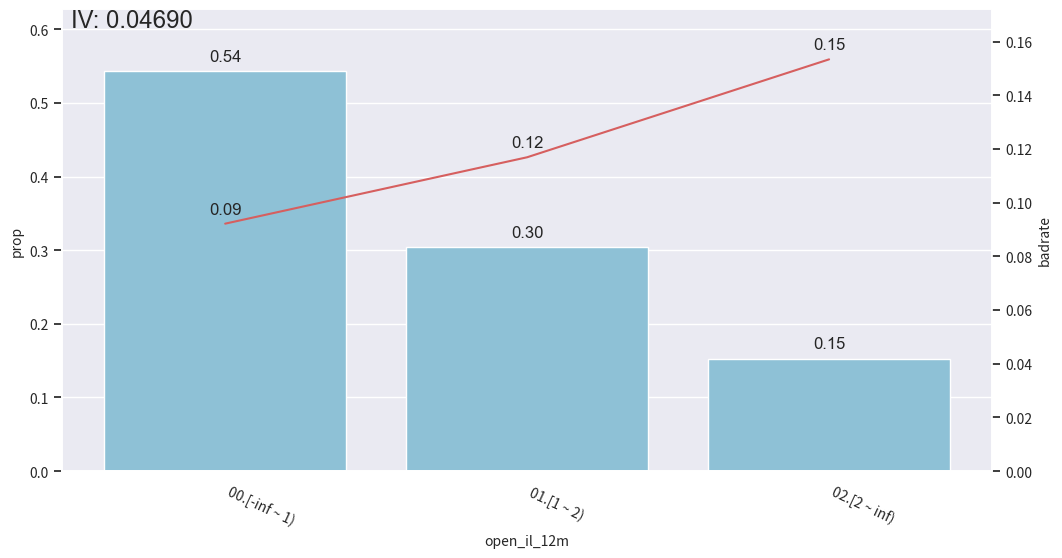

In [13]:
from toad.plot import bin_plot

# Check the bin results of 'var_d2' of in-sample
col = 'open_il_12m'
# rule = {'grade':[['A'], ['B'], ['C'], ['D','E', 'F', 'G']]}
# combiner.update(rule)

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(combiner.transform(train_selected[[col,'target']], labels=True), x=col, target='target')


<Axes: xlabel='issue_date', ylabel='badrate'>

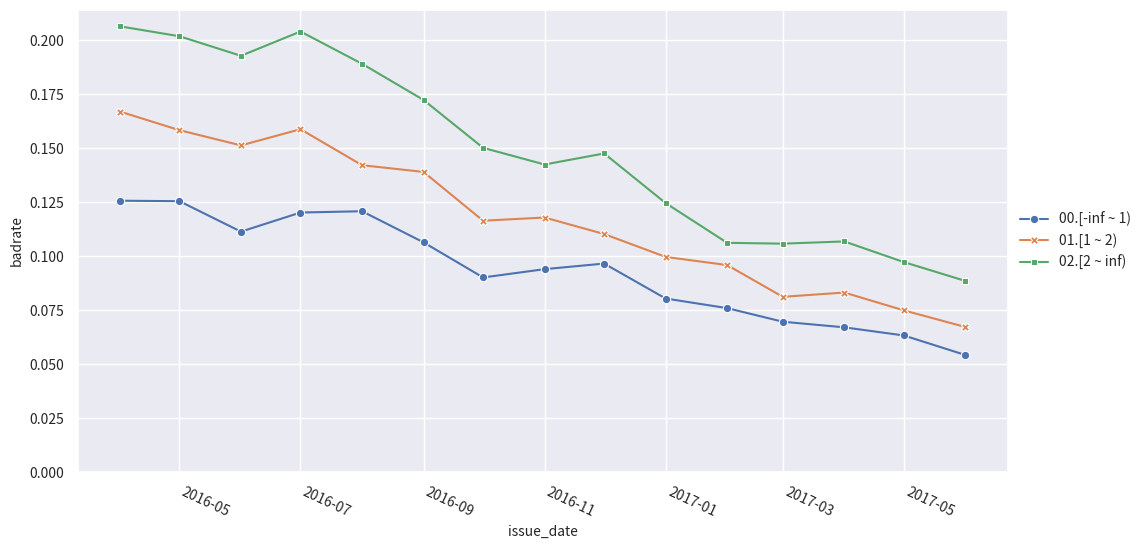

In [14]:
from toad.plot import badrate_plot

badrate_plot(combiner.transform(train_selected[[col,'target','issue_date']], labels=True), target='target', x='issue_date', by=col)


# WOE

In [15]:
# transform
#c.transform(raw_data, labels=False)
transer = toad.transform.WOETransformer()
train_woe = transer.fit_transform(train_binned, train_binned['target'], exclude=['issue_date', 'target'])
print(train_woe.head(3))

  issue_date  target  int_rate     grade  sub_grade  annual_inc  \
0 2016-06-01       0  0.751901  0.055669   0.108494   -0.028870   
1 2016-06-01       0  0.041579  0.055669   0.108494   -0.268089   
2 2016-06-01       1  0.041579  0.055669   0.108494   -0.268089   

   home_ownership       dti  inq_last_6mths  revol_util  mort_acc  \
0       -0.189772 -0.138750        0.130383   -0.261863 -0.006416   
1        0.189805  0.315377       -0.165717    0.200902  0.169860   
2       -0.189772  0.315377        0.451081    0.200902 -0.006416   

   installment  last_credit_pull_d  verification_status  avg_cur_bal  \
0     0.140645           -0.347089            -0.435984     0.049743   
1    -0.196826           -0.347089             0.305636     0.049743   
2    -0.196826           -0.347089            -0.435984    -0.167336   

   acc_open_past_24mths  open_il_12m  
0              0.039019    -0.186855  
1              0.383251    -0.186855  
2              0.383251     0.078435  


In [16]:
test_woe = transer.transform(combiner.transform(test))
OOT_woe = transer.transform(combiner.transform(OOT))

In [ ]:
# Do a stepwise regression on the woe transformed data
final_data = toad.selection.stepwise(train_woe,target = 'target', estimator='ols', direction = 'both', criterion = 'aic', exclude=['issue_date'])

# Apply selected variables to test/OOT data
final_OOT = OOT_woe[final_data.columns]

print(final_data.shape)

(502750, 17)


In [18]:
col = list(final_data.drop(['target'],axis=1).columns)
col.remove('issue_date')
col.remove('verification_status')
col.remove('sub_grade')
print(col)

['int_rate', 'grade', 'annual_inc', 'home_ownership', 'dti', 'inq_last_6mths', 'revol_util', 'mort_acc', 'installment', 'last_credit_pull_d', 'avg_cur_bal', 'acc_open_past_24mths', 'open_il_12m']


In [19]:
#print(final_data[col])
print(final_data['target'])

0         0
1         0
2         1
3         0
4         0
         ..
502745    1
502746    0
502747    0
502748    0
502749    1
Name: target, Length: 502750, dtype: int64


In [ ]:
# Modeling with logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(final_data[col], final_data['target'])

# Predictive training and OOT every other month
pred_train = lr.predict_proba(final_data[col])[:,1]

In [21]:
print(len(pred_train))
print(pred_train)

502750
[0.09507468 0.10718988 0.10270422 ... 0.26558839 0.06873027 0.24347647]


In [22]:
toad.metrics.KS_bucket(pred_train, final_data['target'], bucket=10, method = 'quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,0.007582,0.024823,869,49406,50275,0.017285,0.982715,0.017589,0.015849,0.110301,...,0.109058,0.015849,1.000000,0.110301,1.000000,0.100000,1.000000,0.094451,0.158493,1.000000
1,0.024823,0.038890,1728,48547,50275,0.034371,0.965629,0.035594,0.031516,0.108383,...,0.119255,0.047365,0.984151,0.218684,0.889699,0.200000,0.900000,0.171318,0.315162,1.093501
2,0.038891,0.050843,2282,47993,50275,0.045390,0.954610,0.047549,0.041620,0.107146,...,0.129866,0.088986,0.952635,0.325830,0.781316,0.300000,0.800000,0.236844,0.416203,1.190793
3,0.050843,0.062976,2792,47482,50274,0.055536,0.944464,0.058801,0.050922,0.106005,...,0.141934,0.139908,0.911014,0.431835,0.674170,0.399998,0.700000,0.291927,0.509230,1.301449
4,0.062978,0.078162,3423,46853,50276,0.068084,0.931916,0.073058,0.062430,0.104601,...,0.156333,0.202338,0.860092,0.536436,0.568165,0.500000,0.600002,0.334098,0.624292,1.433482
5,0.078162,0.099265,4405,45868,50273,0.087622,0.912378,0.096036,0.080341,0.102402,...,0.173983,0.282679,0.797662,0.638838,0.463564,0.599996,0.500000,0.356159,0.803439,1.595324
6,0.099265,0.128103,5710,44566,50276,0.113573,0.886427,0.128125,0.104142,0.099495,...,0.195572,0.386821,0.717321,0.738333,0.361162,0.699998,0.400004,0.351512,1.041399,1.793285
7,0.128104,0.164947,7319,42936,50255,0.145637,0.854363,0.170463,0.133488,0.095856,...,0.222906,0.520309,0.613179,0.834190,0.261667,0.799958,0.300002,0.313881,1.335409,2.043917
8,0.164949,0.228535,9826,40470,50296,0.195363,0.804637,0.242797,0.179212,0.090351,...,0.261517,0.699520,0.479691,0.924540,0.165810,0.900000,0.200042,0.225020,1.791369,2.397956
9,0.228539,0.619395,16475,33800,50275,0.327698,0.672302,0.487426,0.300480,0.075460,...,0.327698,1.000000,0.300480,1.000000,0.075460,1.000000,0.100000,-0.000000,3.004797,3.004797


In [23]:
card = toad.ScoreCard(
    combiner = combiner,
    transer = transer,
    #class_weight = 'balanced',
    #C=0.1,
    #base_score = 600,
    #base_odds = 35 ,
    #pdo = 60,
    #rate = 2
)

card.fit(final_data[col], final_data['target'])

ScoreCard(combiner=<toad.transform.Combiner object at 0x000001762DF51A50>,
          transer=<toad.transform.WOETransformer object at 0x0000017632EC2290>)

In [24]:
card.predict(train)

array([637.28295596, 625.73409622, 629.8683058 , ..., 530.28682785,
       667.85391163, 540.37917565])

In [25]:
card.predict(test)

array([710.16697459, 702.6337843 , 686.23594766, ..., 723.80667444,
       621.52732247, 589.76727776])

In [26]:
card.export()

{'int_rate': {'  7.07%,  5.32%,  7.35%,  7.21%,  7.97%,  6.99%,  7.49%,  7.24%,  9.44%,  6.00%,  9.93%,  7.99%,  6.49%,  8.24%,  7.59%, 10.42%': 122.46,
  '  6.97%,  8.59%, 10.91%, 12.62%, 11.39%,  7.39%, 11.44%, 10.49%, 13.59%,  7.89%,  8.99%, 14.08%,  9.49%, 15.05%, 12.74%, 16.02%,  8.39%, 11.49%, 17.09%, 10.99%,  9.16%,  9.75%': 72.08,
  ' 11.99%, 14.99%, 13.49%, 18.06%, 13.99%, 19.03%, 15.99%, 10.75%, 12.79%, 25.82%, 24.85%, 11.47%, 21.45%': 45.82,
  ' 14.49%, 20.00%, 22.91%, 12.99%, 16.99%, 15.59%, 17.99%, 13.67%, 30.75%, 14.46%, 22.74%, 23.88%, 26.30%, 18.99%, 15.31%, 30.65%, 19.99%, 21.49%, 28.72%, 29.69%, 24.74%, 25.49%, 26.24%, 16.29%, 17.27%, 23.99%, 30.17%, 18.25%, 22.39%, 28.69%, 29.99%, 24.49%, 19.53%, 30.94%, 20.99%, 29.49%, 20.75%, 30.79%, 21.18%, 30.89%, 23.13%, 24.99%, 21.97%, 22.35%, 25.29%, 23.32%, 30.74%, 30.84%, 30.99%, 25.69%, 30.49%, 26.49%, 25.65%, 22.45%, 27.49%, 24.11%, 26.99%, 26.14%, 27.34%, 28.18%, 29.67%, 27.79%, 25.44%, 28.34%, 26.57%, 28.99%, 28.88%, 25.

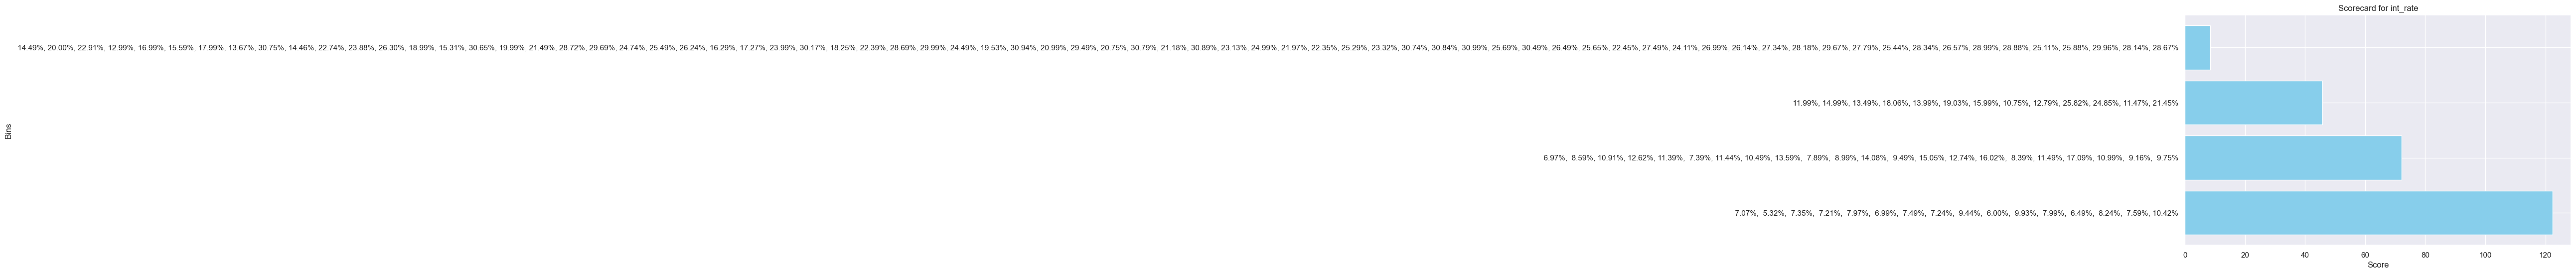

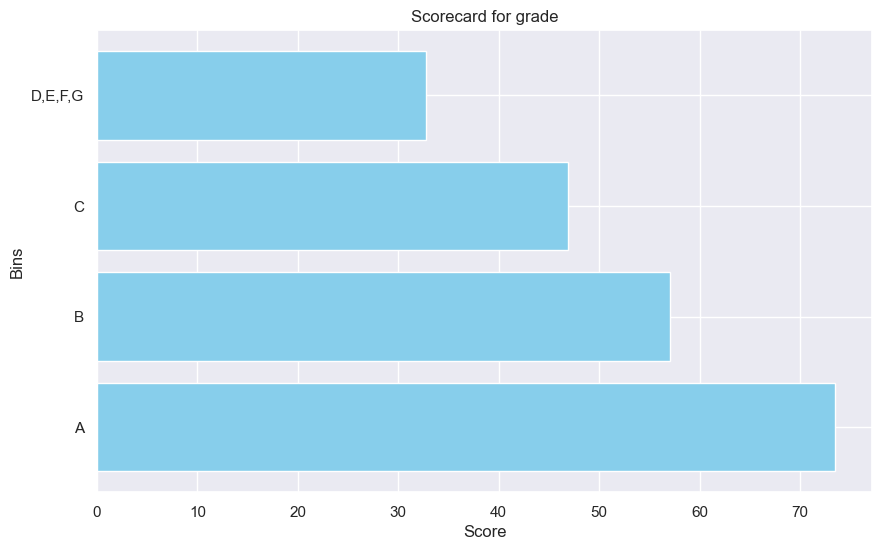

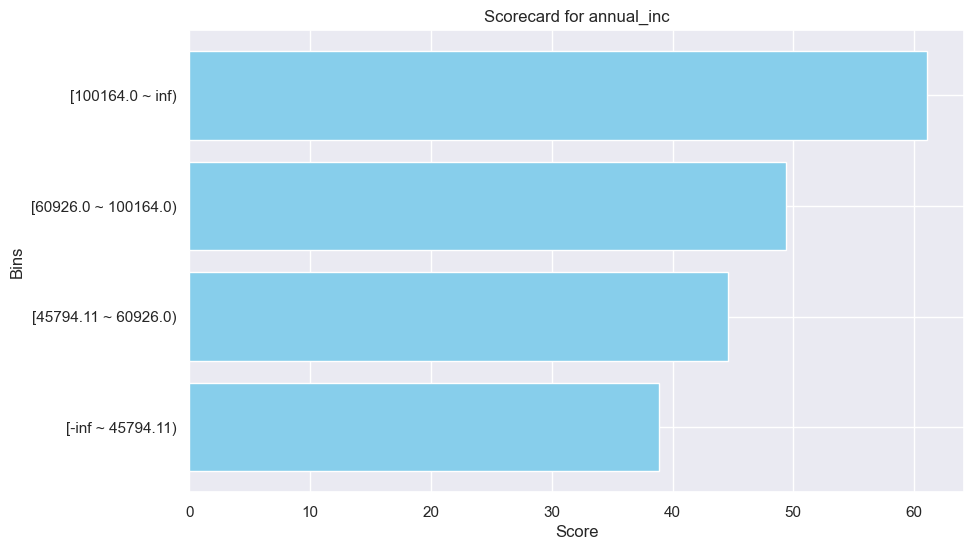

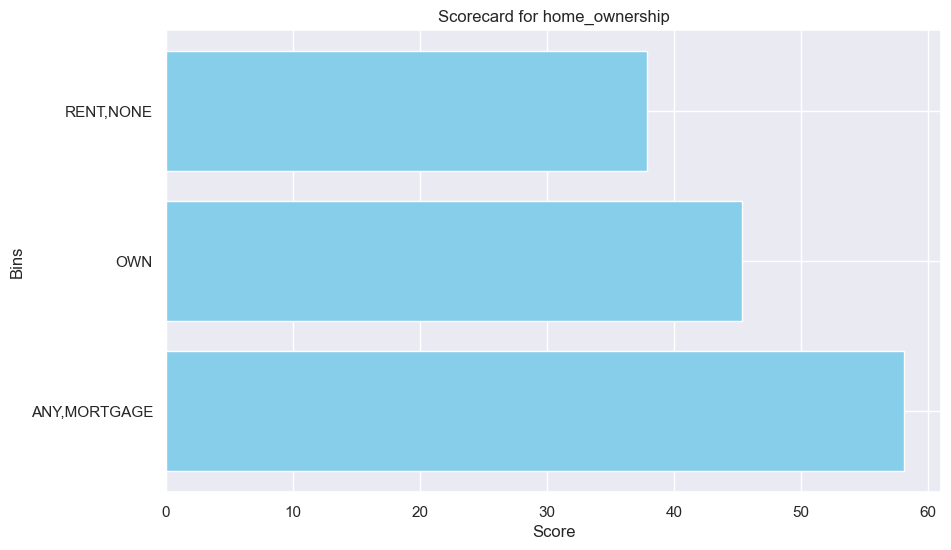

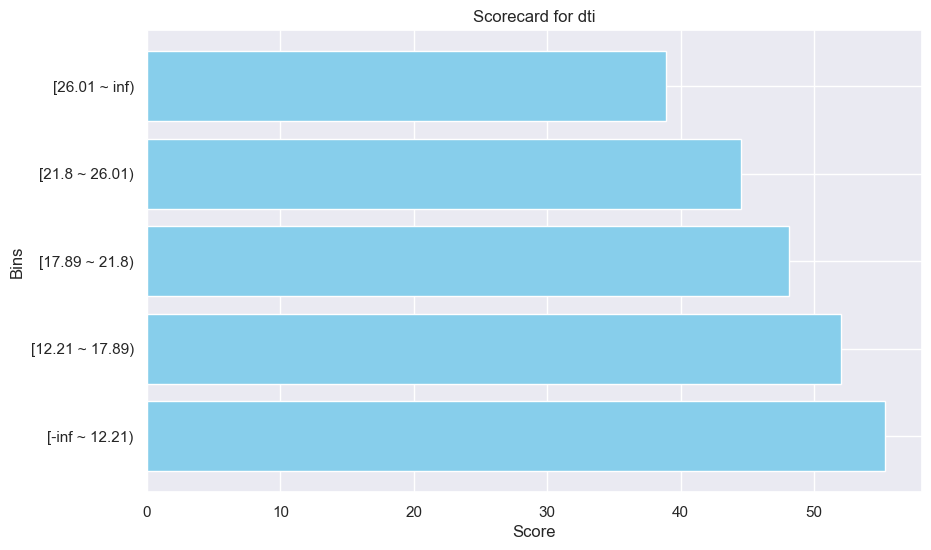

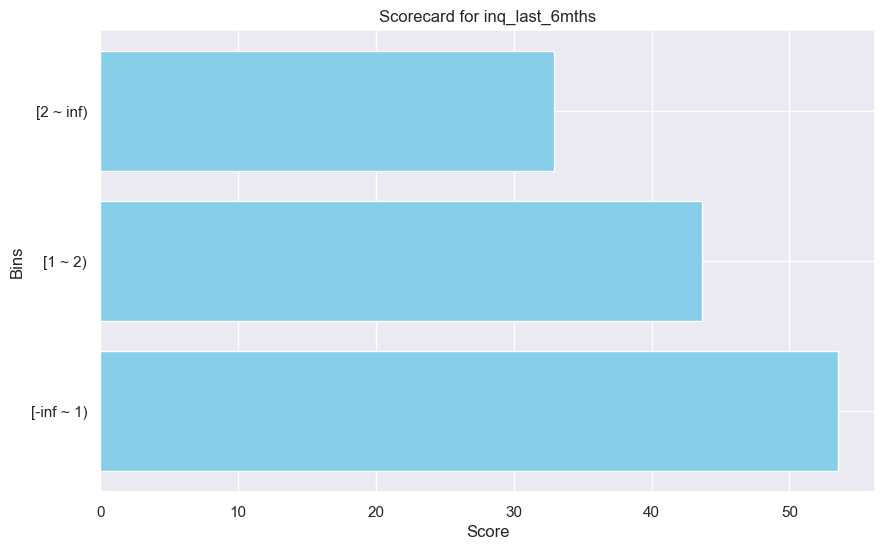

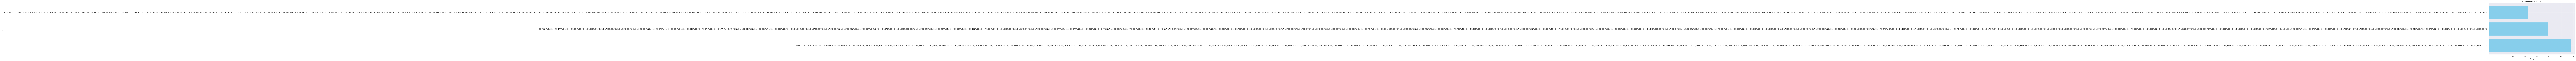

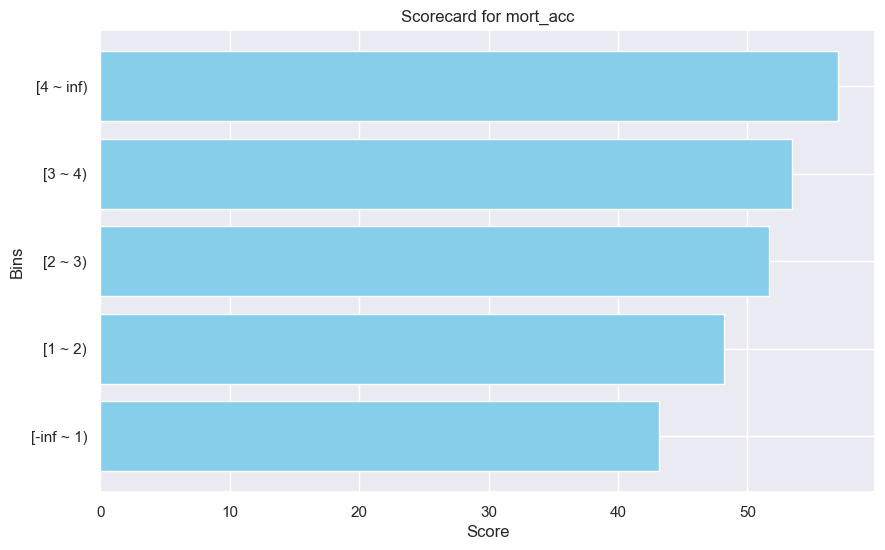

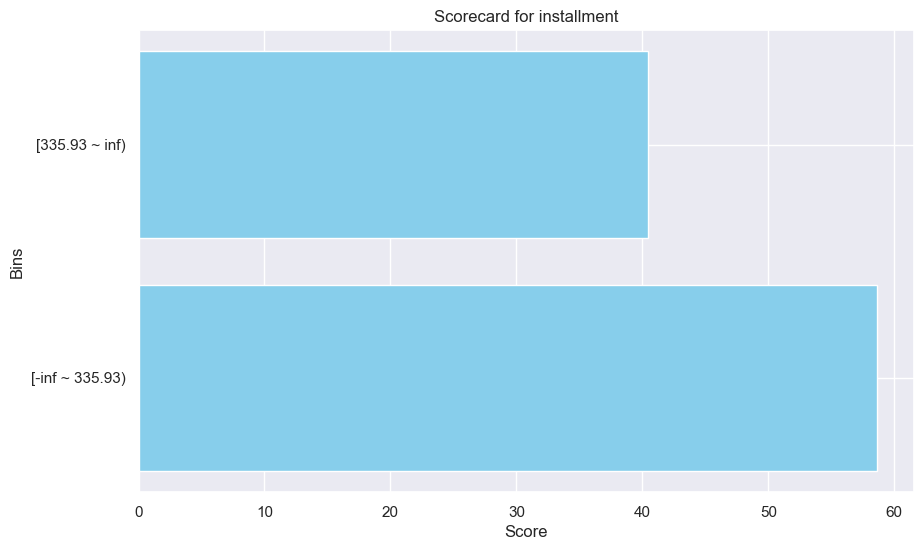

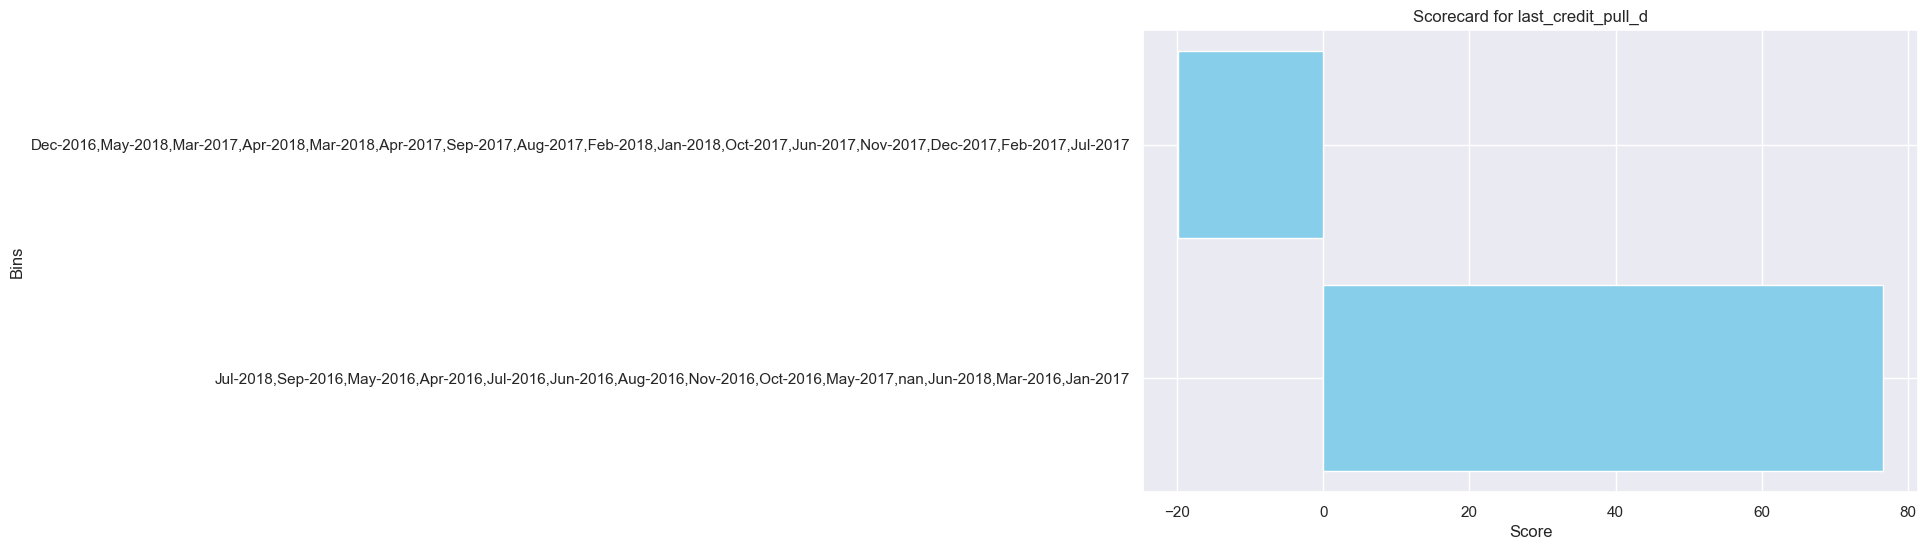

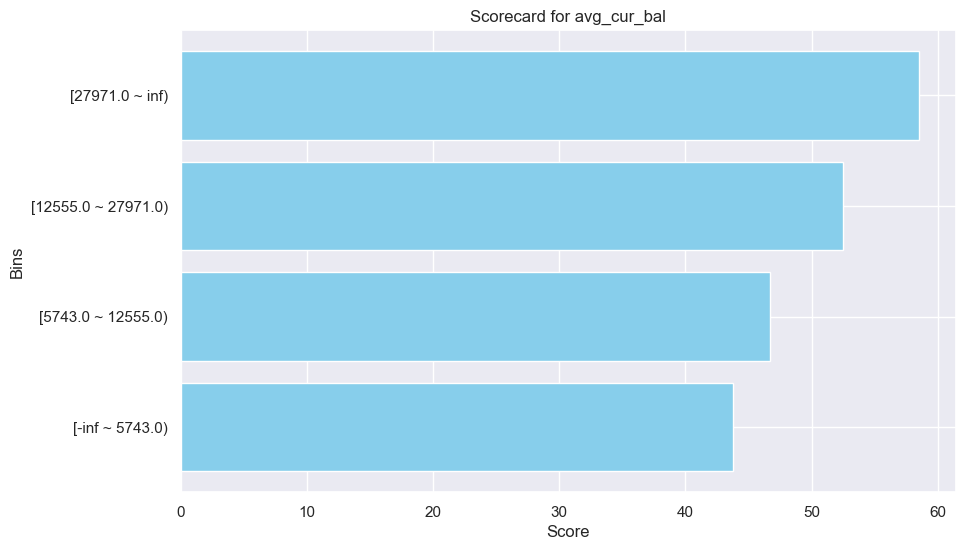

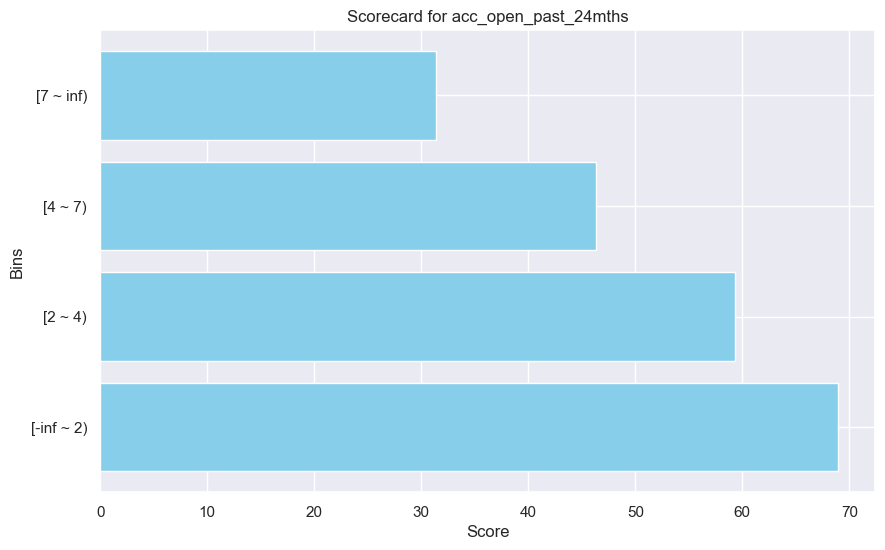

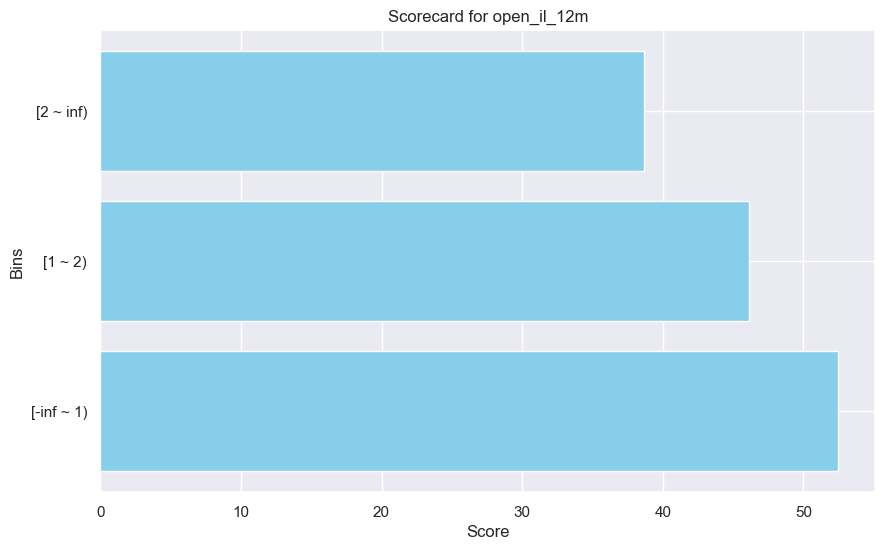

In [27]:
scorecard = card.export()

import matplotlib.pyplot as plt

# Function to plot scorecard data
def plot_scorecard(scorecard):
    for feature, bins in scorecard.items():
        bin_labels = list(bins.keys())
        bin_scores = list(bins.values())

        plt.figure(figsize=(10, 6))
        plt.barh(bin_labels, bin_scores, color='skyblue')
        plt.xlabel('Score')
        plt.ylabel('Bins')
        plt.title(f'Scorecard for {feature}')
        plt.show()

# Assuming scorecard is already defined
plot_scorecard(scorecard)

In [30]:
toad.metrics.matrix(pred_train, final_data['target'], splits=0.3)

Predicted,0,1
Actual,,
0,430258,17663
1,44009,10820
